# TFY41xx Fysikk våren 2021.

Programmet tar utgangspunkt i høyyden til de 8 festepunktene.
Deretter beregnes baneformen $y(x)$ ved hjelp av 7 tredjegradspolynomer, 
et for hvert intervall mellom to festepunkter, slik at både banen $y$, 
dens stigningstall $y^\prime = \frac{dy}{dx}$ og dens andrederiverte
 $y^{\prime \prime} = \frac{d^2y}{dx^2}$ er kontinuerlige i de 6 indre festepunktene.
 I tillegg velges null krumning (andrederivert) 
 i banens to ytterste festepunkter (med `bc_type='natural'` nedenfor).
 Dette gir i alt 28 ligninger som fastlegger de 28 koeffisientene
 i de i alt 7 tredjegradspolynomene.

 De ulike banene er satt opp med tanke paa at kula skal 

*   Fullføre hele banen selv om den taper noe mekanisk energi underveis;
*   Rulle rent, uten  gli ("slure").


Vi importerer noedvendige biblioteker:

In [174]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline


Horisontal avstand mellom festepunktene er 0.200 m:

In [175]:
h = 0.200
xfast=np.asarray([0,h,2*h,3*h,4*h,5*h,6*h,7*h])
g = 9.81
c = 2/5 # Kompakt kule med uniform masseford. => c = 2/5
M = 31 / 1000 # 31 g => kg. Må dele på 1000 for å konvertere

Start, slutt og steglengde i x-rettning

In [176]:
xmin = 0.000
xmax = 1.401
dx = 0.001

Skriv inn y-verdiene til banens 8 festepunkter i tabellen yfast, basert på avlesing i tracker. Et vilkårlig eksempel:

In [177]:
yfast = np.asarray([0.253, 0.176, 0.161, 0.222, 0.192, 0.203, 0.143, 0.108])
# yfast = np.asarray([0.350, 0.315, 0.299, 0.306, 0.281, 0.236, 0.168, 0.200])

Programmet beregner deretter de 7 tredjegradspolynomene, et for hvert intervall mellom to nabofestepunkter. Med scipy.interpolate-funksjonen CubicSpline:

In [178]:
cs = CubicSpline(xfast, yfast, bc_type='natural')


Funksjonen cs kan nå brukes til å regne ut $y(x)$, $y'(x)$ og $y''(x)$ for en vilkårlig horisontal posisjon x, eventuelt for mange horisontale posisjoner lagret i en tabell: <br>
`cs(x)`   tilsvarer $y(x)$<br>
`cs(x,1)` tilsvarer $y'(x)$<br>
`cs(x,2)` tilsvarer $y''(x)$<br>

<br>
Her lager vi en tabell med x-verdier mellom 0 og 1.4 m

In [179]:
x = np.arange(xmin, xmax, dx) 

Funksjonen arange returnerer verdier på det "halvåpne" intervallet
`[xmin,xmax)`, dvs slik at xmin er med mens xmax ikke er med. Her blir
dermed `x[0]=xmin=0.000`, `x[1]=xmin+1*dx=0.001`, ..., `x[1400]=xmax-dx=1.400`, 
dvs x blir en tabell med 1401 elementer

In [180]:
Nx = len(x)
y = cs(x)       #y=tabell med 1401 verdier for y(x)
dy = cs(x,1)    #dy=tabell med 1401 verdier for y'(x)
d2y = cs(x,2)   #d2y=tabell med 1401 verdier for y''(x)

Eksempel: Plotter banens form y(x):

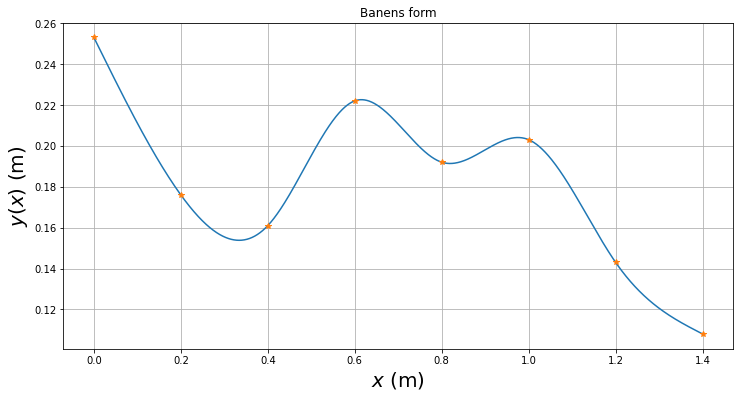

Starthøyde: 0.253 m
Laveste punkt: (1.40, 0.108)


In [181]:
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,xfast,yfast,'*')
plt.title('Banens form')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$y(x)$ (m)',fontsize=20)
plt.grid()
plt.savefig("figures/baneform.jpg")
plt.show()

print(f"Starthøyde: {y[0]} m")

print(f"Laveste punkt: ({x[np.argmin(y)]:.2f}, {np.min(y)})")


Denne koden kan nå utvides til å regne ut flere interessante størelser:

In [182]:
def beta(x):
    return np.arctan(cs(x, 1))

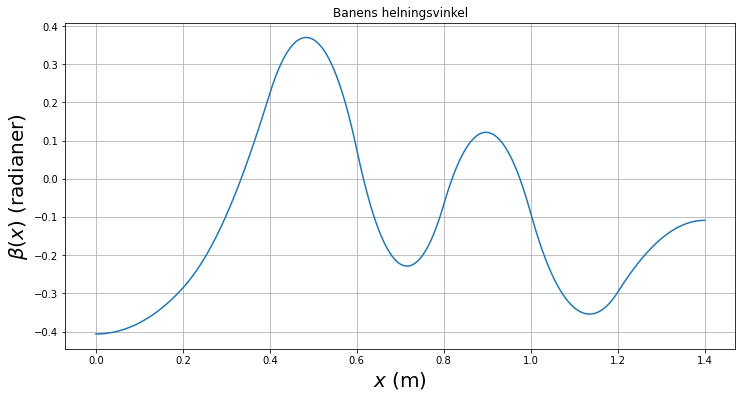

Maks helning: (0.48, 0.37)
Minste helning: (0.00, -0.41)
Gj. helning: -0.10


In [183]:
beta_fig = plt.figure('β(x)',figsize=(12,6))
b = beta(x)
plt.plot(x,b)
plt.title('Banens helningsvinkel')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$β(x)$ (radianer)',fontsize=20)
plt.grid()
plt.savefig("figures/vinkel.jpg")
plt.show()


print(f"Maks helning: ({x[np.argmax(b)]:.2f}, {max(b):.2f})")
print(f"Minste helning: ({x[np.argmin(b)]:.2f}, {min(b):.2f})")
print(f"Gj. helning: {np.mean(b):.2f}")

In [184]:
def krumning(x):
    return cs(x, 2) / ((1 + (cs(x, 1)**2))**(3/2))

    

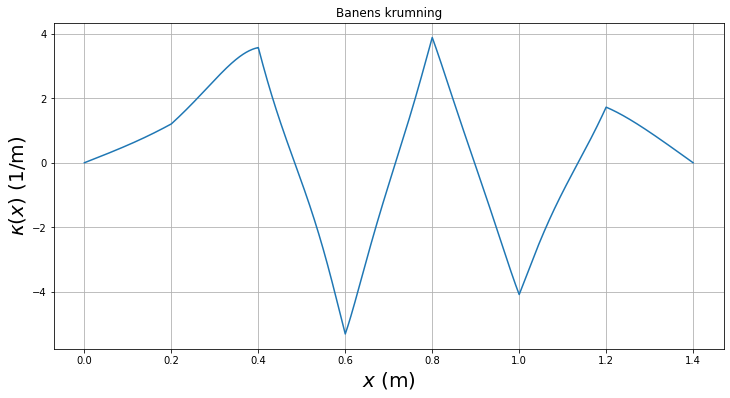

Banens krumning mellom -5.30 og 3.88
Minste krumningsradius 0.26 m


In [185]:
k_fig = plt.figure('κ(x)',figsize=(12,6))
k = krumning(x)
plt.plot(x,k)
plt.title('Banens krumning')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$κ(x)$ (1/m)',fontsize=20)
plt.grid()
plt.savefig("figures/kappa.jpg")
plt.show()

print(f"Banens krumning mellom {min(k):.2f} og {max(k):.2f}")
print(f"Minste krumningsradius {1 / max(k):.2f} m")


In [186]:
def v(x):
    return ((2*g*(y[0]-cs(x)))/(1+c))**(1/2)

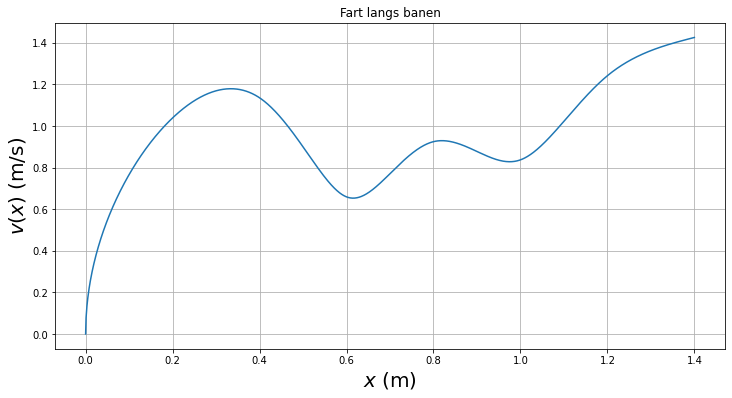

Maks fart: (1.40, 1.43)


In [194]:
v_fig = plt.figure('v(x)',figsize=(12,6))
V = v(x)
plt.plot(x, V)
plt.title('Fart langs banen')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$v(x)$ (m/s)',fontsize=20)
plt.grid()
plt.savefig("figures/fart.jpg")
plt.show()


print(f"Maks fart: ({x[np.argmax(V)]:.2f}, {max(V):.2f})")



In [188]:
def a_perp(x): 
    return np.square(v(x)) * krumning(x)
def N(x):
    return M * (g * np.cos(beta(x)) + a_perp(x))
    

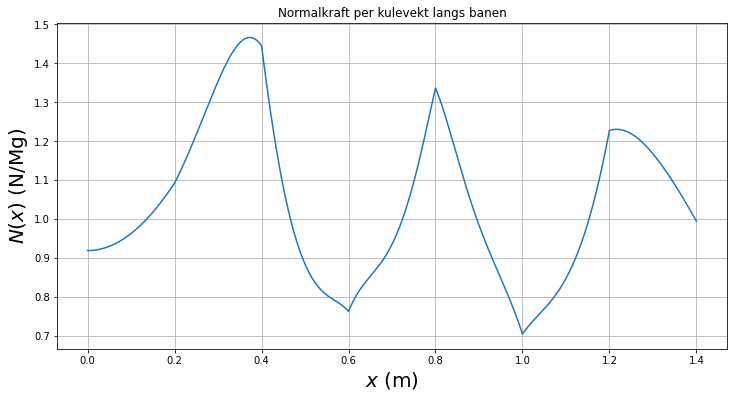

Maks normalkraft: (0.37, 1.47)
Minste normalkraft: (1.00, 0.70)


In [197]:
k_fig = plt.figure('N(x)',figsize=(12,6))
n = N(x) / (M*g)
plt.plot(x, n)
plt.title('Normalkraft per kulevekt langs banen')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$N(x)$ (N/Mg)',fontsize=20)
plt.grid()
plt.savefig("figures/normal.jpg")
plt.show()


print(f"Maks normalkraft: ({x[np.argmax(n)]:.2f}, {max(n):.2f})")
print(f"Minste normalkraft: ({x[np.argmin(n)]:.2f}, {min(n):.2f})")

In [190]:
def friction(x):
    return (c * M * g * np.sin(beta(x)))/(1+c)

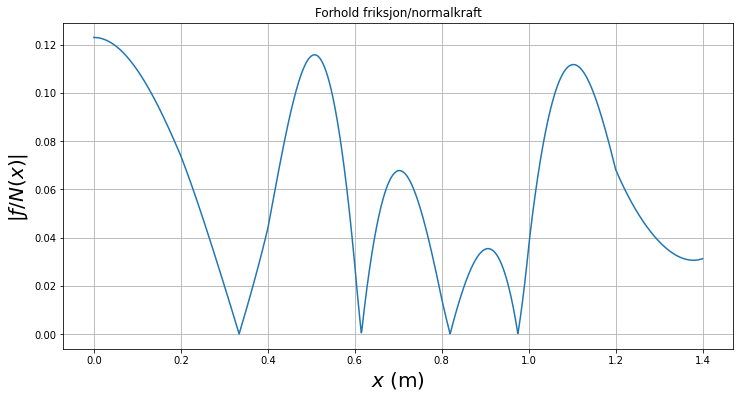

Maks f/N: (0.00, 0.12)
Minste f/N: (0.33, 0.00)


In [199]:
f_N_fig = plt.figure('ƒ/N(x)',figsize=(12,6))
f_n = abs(friction(x) / N(x))
plt.plot(x, f_n)
plt.title('Forhold friksjon/normalkraft')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$|ƒ/N(x)|$ ',fontsize=20)
plt.grid()
plt.savefig("figures/frict_normal.jpg")
plt.show()


print(f"Maks f/N: ({x[np.argmax(f_n)]:.2f}, {max(f_n):.2f})")
print(f"Minste f/N: ({x[np.argmin(f_n)]:.2f}, {min(f_n):.2f})")

In [192]:
def time(x):
    t = [0]
    for x_n in x[1:]:
        v_x = v(x_n) * np.cos(beta(x_n))
        dt = dx / v_x 
        t.append(t[-1] + dt)

    return t
        

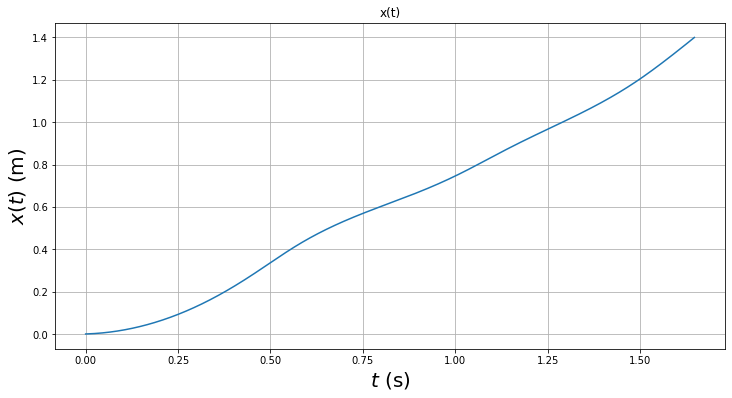

Total tid: 1.65 s


In [201]:
x_fig = plt.figure('Horisontal posisjon per tid',figsize=(12,6))
t = time(x)
plt.plot(t, x)
plt.title('x(t)')
plt.xlabel('$t$ (s)',fontsize=20)
plt.ylabel('$x(t)$ (m)',fontsize=20)
plt.grid()
plt.savefig("figures/dist_time.jpg")
plt.show()


print(f"Total tid: {t[-1]:.2f} s")

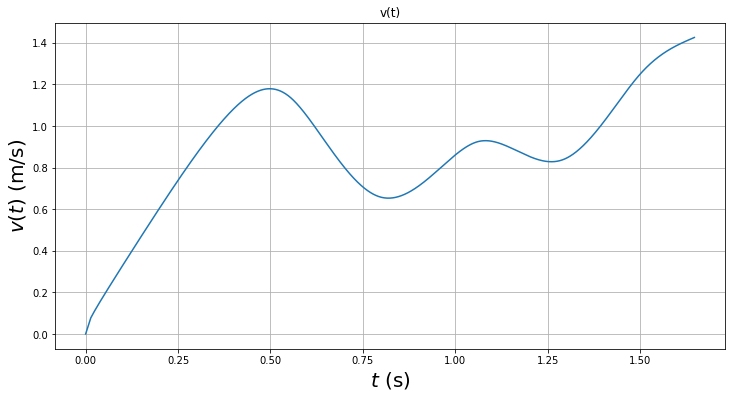

Maks fart oppnådd ved: 1.65


In [204]:
v_fig = plt.figure('Fart per tid',figsize=(12,6))
plt.plot(t, V)
plt.title('v(t)')
plt.xlabel('$t$ (s)',fontsize=20)
plt.ylabel('$v(t)$ (m/s)',fontsize=20)
plt.grid()
plt.savefig("figures/fart_time.jpg")
plt.show()


print(f"Maks fart oppnådd ved: {t[np.argmax(V)]:.2f}")